In [1]:
from scipy import optimize
from itertools import compress
import numpy as np
import matplotlib.pyplot as plt

def calculate_center_lsq(x,y, VERBOSE= True):
    def calc_R(xc, yc):
        """ calculate the distance of each 2D points from the center (xc, yc) """
        return np.sqrt((x-xc)**2 + (y-yc)**2)

    def f_2(c):
        """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
        Ri = calc_R(*c)
        return Ri - Ri.mean()
    # coordinates of the barycenter
    x_m = np.mean(x)
    y_m = np.mean(y)
    center_estimate = x_m, y_m
    center_2, ier = optimize.leastsq(f_2, center_estimate)

    xc_2, yc_2 = center_2
    Ri_2       = calc_R(*center_2)
    R_2        = Ri_2.mean()
    residu_2   = sum((Ri_2 - R_2)**2)

    if VERBOSE:
        print("Center / mm: {},{}".format(xc_2*1e3,yc_2*1e3))
        print("Radius / mm: {}".format(R_2*1e3))
        print("Residuum: {}".format(residu_2))

    return {'xc': xc_2, 'yc': yc_2, 'r': R_2, 'residuum': residu_2}

Center / mm: -0.012835666953944112, 0.01302956726072679


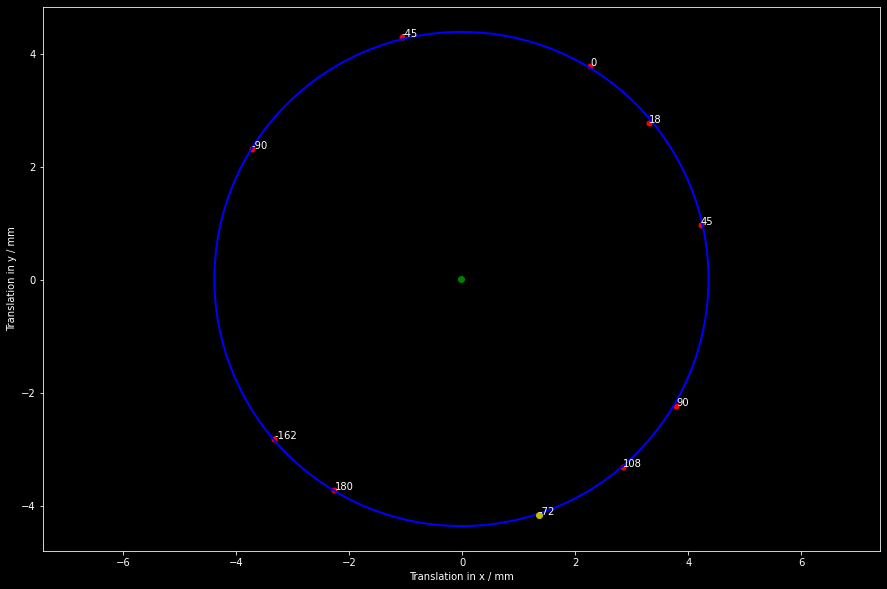

In [2]:


x_test = [3.7821, -3.7195, 2.2640, -2.2600, -3.3271, 3.3103, 2.8408,  4.2165, -1.0722]
y_test = [-2.2328, 2.3071, 3.7821, -3.7274, -2.8135, 2.7697, -3.3138, 0.9637, 4.2885]
phi_test = [90, -90, 0, 180, -162, 18, 108, 45, -45]

result_lsq_test = calculate_center_lsq(x_test, y_test, False)

from ctypes import resize
from matplotlib.patches import Arc as arc
plt.style.use('dark_background')
fig, ax = plt.subplots()
fig.set_size_inches(15,10)

ax.plot(x_test, y_test,'ro',linewidth=2, markersize=5)
for i, txt in enumerate(phi_test):
    ax.annotate(str(round(txt,1)), (x_test[i], y_test[i]))

ellipse = arc(xy=(result_lsq_test['xc'],result_lsq_test['yc']), width=2*result_lsq_test['r'], height=2*result_lsq_test['r'], angle=np.max(phi_test),
                edgecolor='b', fc='None', lw=2, label='Fit', zorder = 2)
ax.add_patch(ellipse)
ax.axis('equal')

ax.plot(result_lsq_test['xc'],result_lsq_test['yc'], 'go')
ax.set_xlabel('Translation in x / mm')
ax.set_ylabel('Translation in y / mm')

angle = -72
x_t2, y_t2 = result_lsq_test['r'] * np.cos(np.deg2rad(angle)), result_lsq_test['r'] * np.sin(np.deg2rad(angle))
ax.plot(x_t2, y_t2 , 'yo')
ax.annotate(str(angle), (x_t2, y_t2))

print("Center / mm: {}, {}".format(result_lsq_test['xc'],result_lsq_test['yc']))

plt.show()

In [3]:
zero_angle = [np.arctan(y/x) for x,y in zip(x_test, y_test)]
np.rad2deg(zero_angle)

array([-30.5558966 , -31.81014969,  59.09487117,  58.770697  ,
        40.21890722,  39.91893773, -49.39471871,  12.87407914,
       -75.96281345])

Center / mm: -0.20402617533659292, 1.2362003119675595
Center: -0.00020402617533659293, 0.0012362003119675594
Radius: 0.004387408101290329


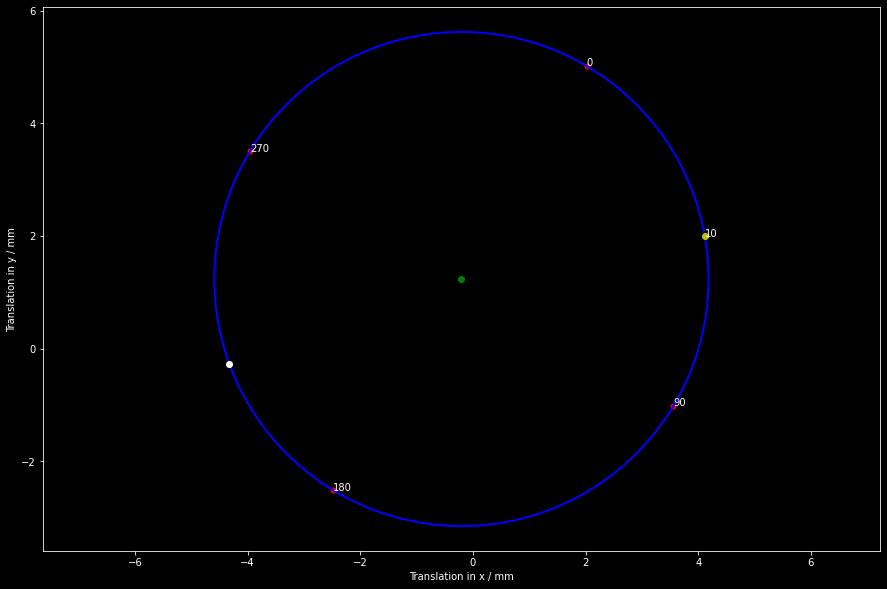

In [4]:
x_script =[0.0020223, 0.003554249, -0.00249183, -0.00395025]
y_script = [0.0050235833, -0.00101633, -0.00251433, 0.003508533]
phi_script = [0 ,90 , 180, 270]

x_script_mm, y_script_mm = [x*1e3 for x in x_script], [y*1e3 for y in y_script]

result_lsq_script = calculate_center_lsq(x_script, y_script, False)

from ctypes import resize
from matplotlib.patches import Arc as arc
plt.style.use('dark_background')
fig, ax = plt.subplots()
fig.set_size_inches(15,10)

ax.plot(x_script_mm, y_script_mm,'ro',linewidth=2, markersize=5)
for i, txt in enumerate(phi_script):
    ax.annotate(str(round(txt,1)), (x_script_mm[i], y_script_mm[i]))

ellipse = arc(xy=(result_lsq_script['xc']*1e3,result_lsq_script['yc']*1e3), width=2*result_lsq_script['r']*1e3, height=2*result_lsq_script['r']*1e3,
        angle=np.max(phi_script),edgecolor='b', fc='None', lw=2, label='Fit', zorder = 2)
ax.add_patch(ellipse)
ax.axis('equal')

ax.plot(result_lsq_script['xc']*1e3,result_lsq_script['yc']*1e3, 'go')
ax.set_xlabel('Translation in x / mm')
ax.set_ylabel('Translation in y / mm')

angle = 10
x_t2= result_lsq_script['r']*1e3 * np.cos(np.deg2rad(angle)) + result_lsq_script['xc']*1e3
y_t2 = result_lsq_script['r']*1e3 * np.sin(np.deg2rad(angle)) + result_lsq_script['yc']*1e3

r_new = np.deg2rad(180 + angle)
index = 2
x_mirrored = np.cos(r_new) * (x_t2 - result_lsq_script['xc']*1e3) - (y_t2 - result_lsq_script['yc']*1e3)  * np.sin(r_new) + result_lsq_script['xc']*1e3
y_mirrored = np.sin(r_new) * (x_t2 - result_lsq_script['xc']*1e3) + (y_t2 - result_lsq_script['yc']*1e3)  * np.cos(r_new) + result_lsq_script['yc']*1e3

ax.plot(x_t2, y_t2 , 'yo')
ax.annotate(str(angle), (x_t2, y_t2))

ax.plot(x_mirrored, y_mirrored , 'wo')

print("Center / mm: {}, {}".format(result_lsq_script['xc']*1e3,result_lsq_script['yc']*1e3))
print("Center: {}, {}".format(result_lsq_script['xc'],result_lsq_script['yc']))
print("Radius: {}".format(result_lsq_script['r']))

plt.show()


In [5]:
from pathlib import Path
import csv, math

folder = Path(r'\\samba-pool-plitzko2.biochem.mpg.de\pool-plitzko2\Johann\03-Data\06-FIB-SEM\220922_MeteorAutomation\220926_223858_1.0deg_360_3mm_MovementTestAligned')
file = Path.joinpath(folder, 'position_data.csv')


with open(file, mode='r') as f:
    reader = csv.DictReader(f)
    positions_str = list(reader)


positions = [dict([a, float(x)] for a, x in b.items()) for b in positions_str]
position_angles = [np.rad2deg(float(x['r'])) for x in positions_str]
#print(positions)
print(positions[0])
#for i in range(len(positions)):
#    print(positions[0])
print(positions[0]['r']/math.pi*180 -360)


position_standard = {}
position_standard['x'] = -2.1915e-3
position_standard['y'] = -4.3908e-3
position_standard['z'] = 6.9725e-3
position_standard['t'] = 0.0
position_standard['r'] = 2*math.pi
positions_sorted = sorted(positions, key=lambda d: d['r']) 
#print(positions_sorted)

{'x': 0.001959059527801177, 'y': 0.005051299277471823, 'z': 0.03541303369341564, 'r': -0.017453292519943295, 't': 0.0}
-361.0


{'x': 0.001959059527801177, 'y': 0.005051299277471823, 'z': 0.03541303369341564, 'r': -0.017453292519943295, 't': 0.0}
-361.0
Center / mm: -0.25408000000000003, 1.23574
Center: -0.25408000000000003, 1.23574
Radius: 4.410949916901949


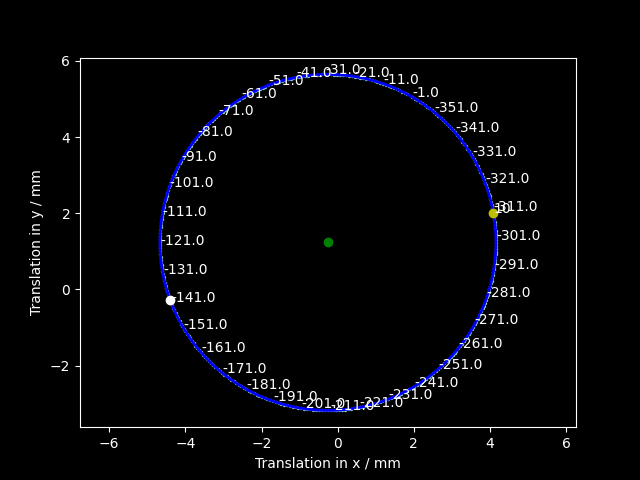

In [21]:
def plot_postion_data(file):
    from pathlib import Path
    import csv, math

    with open(file, mode='r') as f:
        reader = csv.DictReader(f)
        positions_str = list(reader)


    positions = [dict([a, float(x)] for a, x in b.items()) for b in positions_str]
    position_angles = [np.rad2deg(float(x['r'])) for x in positions_str]
    #print(positions)
    print(positions[0])
    #for i in range(len(positions)):
    #    print(positions[0])
    print(positions[0]['r']/math.pi*180 -360)
    x_script_mm, y_script_mm, angles_file = [p['x']*1e3 for p in positions],[p['y']*1e3 for p in positions], [np.rad2deg(p['r']) for p in positions]

    result_lsq_script = calculate_center_lsq(x_script_mm, y_script_mm, False)

    from ctypes import resize
    from operator import mod
    from matplotlib.patches import Arc as arc
    %matplotlib widget

    plt.style.use('dark_background')
    fig, ax = plt.subplots()

    ax.scatter(x_script_mm, y_script_mm,2 )
    for i, txt in enumerate(angles_file):
        if i % 10 == 0:
            ax.annotate(str(round(angles_file[i],1)), (x_script_mm[i], y_script_mm[i]))

    ellipse = arc(xy=(result_lsq_script['xc'],result_lsq_script['yc']), width=2*result_lsq_script['r'], height=2*result_lsq_script['r'],
            angle=np.max(phi_script),edgecolor='b', fc='None', lw=2, label='Fit', zorder = 2)
    ax.add_patch(ellipse)

    ax.plot(result_lsq_script['xc'],result_lsq_script['yc'], 'go')
    ax.set_xlabel('Translation in x / mm')
    ax.set_ylabel('Translation in y / mm')

    angle = 10
    x_t2= result_lsq_script['r'] * np.cos(np.deg2rad(angle)) + result_lsq_script['xc']
    y_t2 = result_lsq_script['r'] * np.sin(np.deg2rad(angle)) + result_lsq_script['yc']

    r_new = np.deg2rad(180 + angle)
    index = 2
    x_mirrored = np.cos(r_new) * (x_t2 - result_lsq_script['xc']) - (y_t2 - result_lsq_script['yc'])  * np.sin(r_new) + result_lsq_script['xc']
    y_mirrored = np.sin(r_new) * (x_t2 - result_lsq_script['xc']) + (y_t2 - result_lsq_script['yc'])  * np.cos(r_new) + result_lsq_script['yc']

    ax.plot(x_t2, y_t2 , 'yo')
    ax.annotate(str(angle), (x_t2, y_t2))

    ax.plot(x_mirrored, y_mirrored , 'wo')

    ax.axis('equal')
    print("Center / mm: {}, {}".format(result_lsq_script['xc'],result_lsq_script['yc']))
    print("Center: {}, {}".format(result_lsq_script['xc'],result_lsq_script['yc']))
    print("Radius: {}".format(result_lsq_script['r']))

    plt.show()



folder = Path(r'\\samba-pool-plitzko2.biochem.mpg.de\pool-plitzko2\Johann\03-Data\06-FIB-SEM\220922_MeteorAutomation\220926_223858_1.0deg_360_3mm_MovementTestAligned')
file = Path.joinpath(folder, 'position_data.csv')

plot_postion_data(file)

{'x': 0.0019592247147165003, 'y': 0.005051385481022271, 'z': 0.03541277649176955, 'r': -0.017453292519943295, 't': 0.0}
-361.0
Center / mm: -0.2540800000000003, 1.23574
Center: -0.2540800000000003, 1.23574
Radius: 4.411107366300662


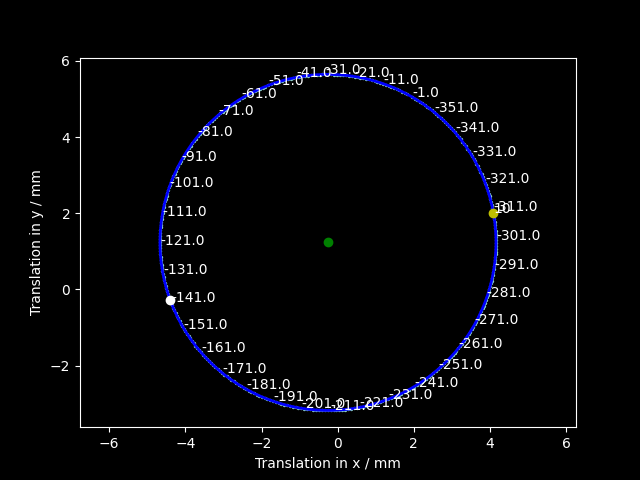

In [22]:

folder = Path(r'\\samba-pool-plitzko2.biochem.mpg.de\pool-plitzko2\Johann\03-Data\06-FIB-SEM\220922_MeteorAutomation\220926_230456_1.0deg_360_300um_MovementTestAligned')
file = Path.joinpath(folder, 'position_data.csv')

plot_postion_data(file)